In [14]:
import h5py
path = '/home/xiaoxinyu/dataset/test.h5' 
# with h5py.File(path, 'r') as f: # open file

    # f.visit(print)
    # print(f['Nmodes2_Rs80_Nch11_Pch0_257157263/Rx(sps=2,chid=0,method=frequency cut)/Tx'].shape)

# check data

In [6]:
import pkufiber as pf
import matplotlib.pyplot as plt, numpy as np
from pkufiber.data.loader import FiberDataset
path = '/home/xiaoxinyu/dataset/test.h5'


def get_data(path, method='CDC'):
    q_list = []
    for pch in range(-3, 7):
        data = FiberDataset(path, Nch=1, Rs=40, Pch=pch, Nmodes=2,
                        window_size=70000, strides=1, num_symb=70000, truncate=20000, Tx_window=True, pre_transform=f'Rx_{method}DDLMS(taps=32,lr=[0.015625, 0.0078125])')
        Rx,Tx, info = data[0]
        q_list.append(pf.qfactor_all(Rx, Tx))
    return q_list

In [9]:
path = '/home/xiaoxinyu/dataset/train.h5'
q1 = get_data(path, method='DBP1')

path = '/home/xiaoxinyu/TorchFiber/dataset_A800/test.h5'
q2 = get_data(path, method='DBP1')

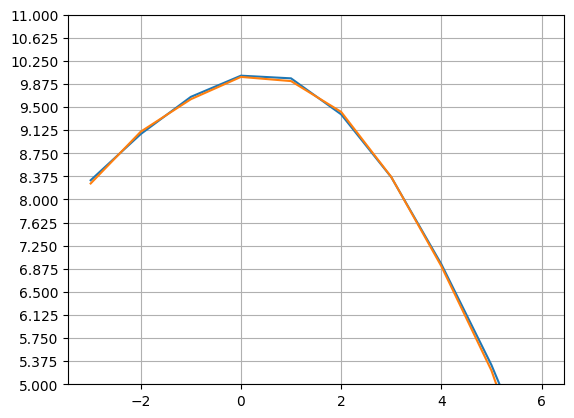

In [11]:
plt.plot(range(-3, 7), q1)
plt.plot(range(-3, 7), q2)
plt.ylim(5, 11)
plt.yticks(np.linspace(5, 11, 17))
plt.grid()

# Q path

In [60]:
# path = '/home/xiaoxinyu/dataset/train.h5'

def qpath(path, num):
    data = FiberDataset(path, Nch=1, Rs=40, Pch=0, Nmodes=2,
        window_size=70000, strides=70000, num_symb=200000, truncate=20000, Tx_window=True, pre_transform=f'Rx_CDCDDLMS(taps=32,lr=[0.015625, 0.0078125])')
    Rx,Tx, info = data[num]
    q = pf.qfactor_path(Rx, Tx, stride=2000)
    return q

In [61]:
data = FiberDataset(path, Nch=1, Rs=40, Pch=0, Nmodes=2,
        window_size=70000, strides=1, num_symb=200000, truncate=20000, Tx_window=True, pre_transform=f'Rx_CDCDDLMS(taps=32,lr=[0.015625, 0.0078125])')


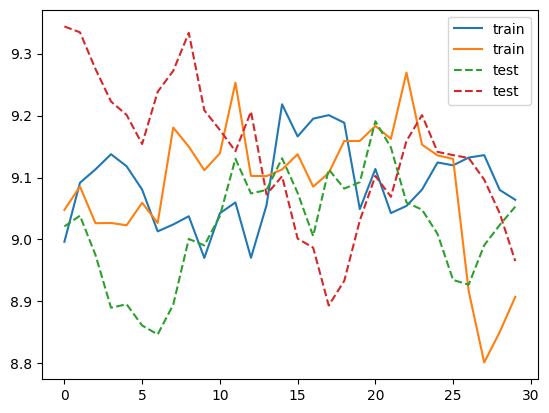

In [67]:
q1 = qpath('/home/xiaoxinyu/dataset/train.h5', 0)
q2 = qpath('/home/xiaoxinyu/dataset/train.h5', 1)
q3 = qpath('/home/xiaoxinyu/TorchFiber/dataset_A800/test.h5', 0)
q4 = qpath('/home/xiaoxinyu/TorchFiber/dataset_A800/test.h5', 1)
plt.plot(q1, label='train')
plt.plot(q2, label='train')
plt.plot(q3,'--', label='test')
plt.plot(q4, '--', label='test')
plt.legend()